In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os
from sklearn.model_selection import train_test_split

In [20]:
def preprocess_image(img,target_size=(256,256)):
    img = cv2.imread(img)
    img = cv2.resize(img,target_size)
    img = img.astype(np.float32) / 255.0
    
    return img

In [21]:
Data_dir = '../Datasets/rotten or not Dataset'
X_data = []
y_data = []
for label in os.listdir(Data_dir):
    dir = os.path.join(Data_dir,label)
    for img_file in os.listdir(dir):
        img_path = os.path.join(dir,img_file)
        img = preprocess_image(img_path)
        X_data.append(img)
        y_data.append(label)

X_data = np.array(X_data)
y_data = np.array(y_data)

In [22]:
print(X_data.shape)
print(y_data.shape)

(561, 256, 256, 3)
(561,)


In [23]:
shuffle_indices = np.random.permutation(len(X_data))
X_data = X_data[shuffle_indices]
y_data = y_data[shuffle_indices]


In [24]:
y_data

array(['fresh', 'rotten', 'fresh', 'fresh', 'fresh', 'fresh', 'rotten',
       'fresh', 'rotten', 'fresh', 'fresh', 'rotten', 'fresh', 'fresh',
       'fresh', 'fresh', 'fresh', 'fresh', 'fresh', 'fresh', 'fresh',
       'rotten', 'fresh', 'rotten', 'fresh', 'rotten', 'fresh', 'rotten',
       'fresh', 'fresh', 'fresh', 'fresh', 'fresh', 'rotten', 'fresh',
       'fresh', 'fresh', 'fresh', 'rotten', 'rotten', 'fresh', 'rotten',
       'fresh', 'rotten', 'rotten', 'fresh', 'rotten', 'fresh', 'rotten',
       'rotten', 'fresh', 'fresh', 'fresh', 'rotten', 'rotten', 'rotten',
       'rotten', 'rotten', 'fresh', 'fresh', 'rotten', 'fresh', 'fresh',
       'fresh', 'fresh', 'fresh', 'rotten', 'fresh', 'rotten', 'rotten',
       'fresh', 'fresh', 'rotten', 'fresh', 'fresh', 'fresh', 'rotten',
       'rotten', 'fresh', 'fresh', 'fresh', 'fresh', 'rotten', 'fresh',
       'rotten', 'fresh', 'fresh', 'rotten', 'rotten', 'fresh', 'rotten',
       'fresh', 'fresh', 'fresh', 'rotten', 'fresh', 'ro

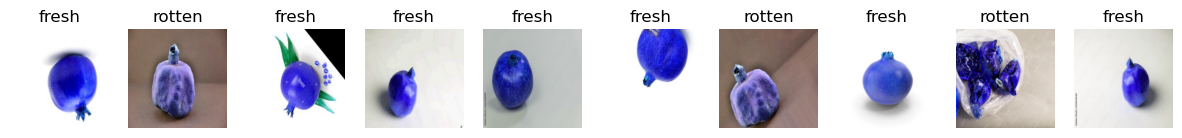

In [25]:
no_of_images = 10
fig,axes = plt.subplots(1,no_of_images,figsize=(15,8))
for i in range(no_of_images):
    axes[i].imshow(X_data[i])
    axes[i].axis('off')
    axes[i].set_title(y_data[i])

plt.show()

In [26]:
from sklearn.preprocessing import LabelEncoder

labels = ['Fresh','Rotten']
encoder = LabelEncoder()
y_data = encoder.fit_transform(y_data)
y_data

array([0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,

In [27]:
#splitting data
X,X_test,y,y_test = train_test_split(X_data,y_data,test_size=0.2,random_state=42)

In [28]:
#splittind training data into train and validation
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.2,random_state=42)

In [29]:
print(f'x_train:{X_train.shape}')
print(f'x_val:{X_val.shape}')
print(f'x_test:{X_test.shape}')


x_train:(358, 256, 256, 3)
x_val:(90, 256, 256, 3)
x_test:(113, 256, 256, 3)


In [33]:
# Building model
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Flatten, Dense, Dropout
from keras.activations import relu,softmax,sigmoid
from keras.optimizers import Adam

input_shape = (256,256,3)
no_of_classes = 2

model = Sequential()
model.add(Flatten(input_shape = input_shape))
model.add(Dense(256,activation=relu))
model.add(Dense(128,activation=relu))
model.add(Dense(no_of_classes,activation=sigmoid))

In [34]:
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
              )

In [41]:
history = model.fit(X_train,y_train,
          epochs=10,
          batch_size=12,
          validation_data=(X_val,y_val)
          )

Epoch 1/10
30/30 [==============================] - 19s 618ms/step - loss: 3.4558 - accuracy: 0.6816 - val_loss: 10.0450 - val_accuracy: 0.5000
Epoch 2/10
30/30 [==============================] - 17s 575ms/step - loss: 7.0760 - accuracy: 0.6983 - val_loss: 12.4089 - val_accuracy: 0.5111
Epoch 3/10
30/30 [==============================] - 17s 569ms/step - loss: 7.1162 - accuracy: 0.5922 - val_loss: 19.5942 - val_accuracy: 0.4889
Epoch 4/10
30/30 [==============================] - 17s 571ms/step - loss: 7.1520 - accuracy: 0.6760 - val_loss: 3.6289 - val_accuracy: 0.7222
Epoch 5/10
30/30 [==============================] - 17s 575ms/step - loss: 2.9929 - accuracy: 0.7402 - val_loss: 1.3786 - val_accuracy: 0.6778
Epoch 6/10
30/30 [==============================] - 17s 577ms/step - loss: 1.4647 - accuracy: 0.7486 - val_loss: 1.1804 - val_accuracy: 0.7222
Epoch 7/10
30/30 [==============================] - 17s 575ms/step - loss: 1.1947 - accuracy: 0.7682 - val_loss: 1.1544 - val_accuracy: 0.7

In [42]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 196608)            0         
                                                                 
 dense_9 (Dense)             (None, 256)               50331904  
                                                                 
 dense_10 (Dense)            (None, 128)               32896     
                                                                 
 dense_11 (Dense)            (None, 2)                 258       
                                                                 
Total params: 50365058 (192.13 MB)
Trainable params: 50365058 (192.13 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [43]:
test_loss, test_accuracy = model.evaluate(X_test,y_test)
print(f'test_loss:{test_loss}')
print(f'test_accuracy:{test_accuracy}')


4/4 [==============================] - 1s 146ms/step - loss: 0.8579 - accuracy: 0.7699
test_loss:0.8578871488571167
test_accuracy:0.769911527633667


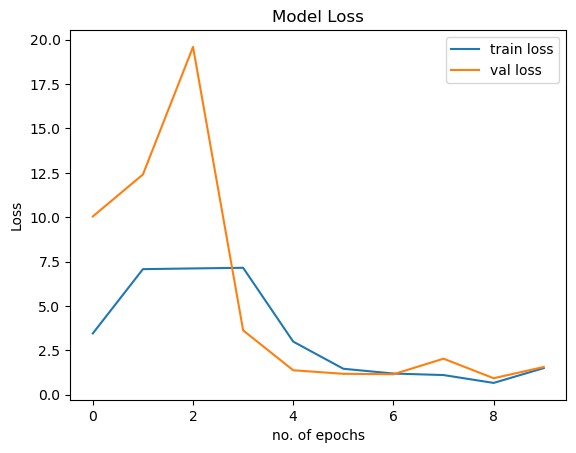

In [44]:
plt.plot(history.history['loss'],label='train loss')
plt.plot(history.history['val_loss'],label='val loss')
plt.title('Model Loss')
plt.xlabel('no. of epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

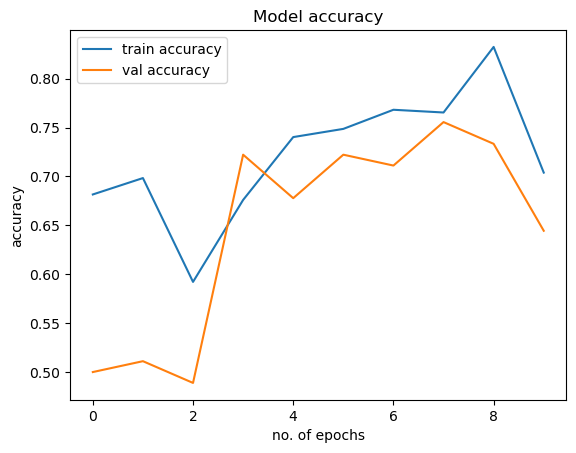

In [45]:
plt.plot(history.history['accuracy'],label='train accuracy')
plt.plot(history.history['val_accuracy'],label='val accuracy')
plt.title('Model accuracy')
plt.xlabel('no. of epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

4/4 [==============================] - 1s 111ms/step


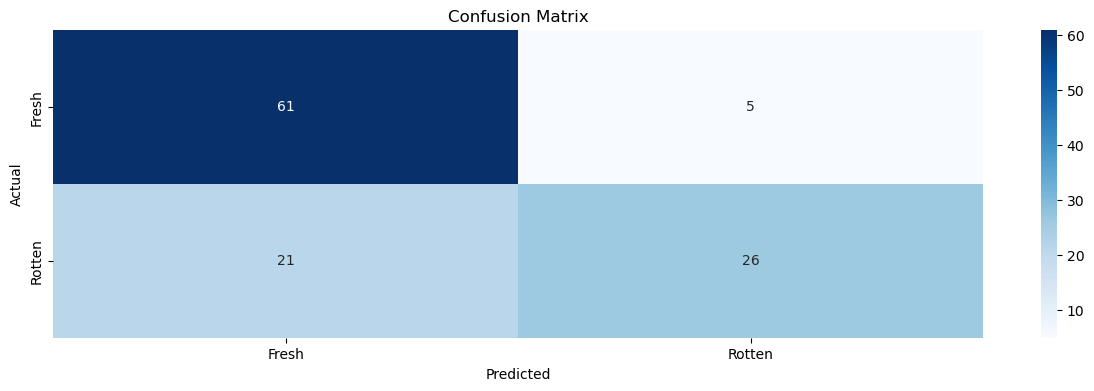

In [46]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred,axis=1)
cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(15, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()